In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def call_profit(strike, spot, premium=0, position='long'):
  pnl = np.where(spot>strike, spot-strike, 0) - premium
  if position == 'long':
    return pnl
  elif position == 'short':
    return -1.0 * pnl
  else:
    return np.nan

def put_profit(strike, spot, premium=0, position='long'):
  pnl = np.where(spot<strike, strike-spot, 0) - premium
  if position == 'long':
    return pnl
  elif position == 'short':
    return -1.0 * pnl
  else:
    return np.nan

def pain(strike, oi, typ='call'):
  pain = []
  for exspot in strike:
    t = 0
    for st, o in zip(strike, oi):
      if typ == 'call':
        t += call_profit(st, exspot)*o
      if typ == 'put' :
        t += put_profit(st, exspot)*o
    pain.append(t)
  return pain

def to_num(x):
  s = []
  for el in x:
    try:    
      s.append(float(el))
    except:
      st = el.split(',')
      for _ in st:
        stri = ''.join(st)
      s.append(float(stri))
  return pd.Series(s)

def max_pain(file_path_to_option_chain):
  option_chain = pd.read_csv(file_path_to_option_chain, na_values='-', skiprows=1).fillna(0).apply(to_num)
  cols = option_chain.columns
  columns_of_interest = ['OI', 'VOLUME', 'IV', 'LTP', 'STRIKE PRICE', 'LTP.1', 'IV.1', 'VOLUME.1', 'OI.1']
  oc = option_chain[columns_of_interest]
  display(oc)
  call_pain = pain(oc['STRIKE PRICE'], oc['OI'], typ='call')
  put_pain = pain(oc['STRIKE PRICE'], oc['OI.1'], typ='put')
  plt.figure(figsize=(16,9))
  plt.bar(oc['STRIKE PRICE'], call_pain, width=3)
  plt.bar(oc['STRIKE PRICE'], put_pain, width=3)
  plt.show()
  MAX_PAIN = pd.DataFrame()
  MAX_PAIN['STRIKE PRICE'] = oc['STRIKE PRICE']
  MAX_PAIN['CALL OI'] = oc['OI']
  MAX_PAIN['PUT OI'] = oc['OI.1']
  MAX_PAIN['CALL PAIN'] = pd.Series(call_pain)
  MAX_PAIN['PUT PAIN'] = pd.Series(put_pain)
  MAX_PAIN['TOTAL PAIN'] = MAX_PAIN['CALL PAIN'] + MAX_PAIN['PUT PAIN']
  pcr = MAX_PAIN['PUT OI'].sum()/MAX_PAIN['CALL OI'].sum()
  print('--------------------------')
  print(f'PCR: {pcr}')
  print('--------------------------')
  display(MAX_PAIN.iloc[MAX_PAIN['TOTAL PAIN'].idxmin()])#.astype('int64'))
  return MAX_PAIN

,OI,VOLUME,IV,LTP,STRIKE PRICE,LTP.1,IV.1,VOLUME.1,OI.1
0,1.0,0.0,0.00,2073.5,14950.0,0.20,96.88,1955.0,1439.0
1,3.0,0.0,0.00,2283.2,15000.0,0.15,92.84,72248.0,25560.0
2,0.0,0.0,0.00,0.0,15050.0,0.20,93.10,150.0,194.0
3,0.0,0.0,0.00,0.0,15100.0,0.25,92.91,1290.0,1231.0
4,0.0,0.0,0.00,0.0,15150.0,0.20,89.34,1649.0,357.0
...,...,...,...,...,...,...,...,...,...
105,367.0,286.0,86.81,0.2,20200.0,0.00,0.00,0.0,0.0
106,191.0,72.0,96.96,0.6,20250.0,0.00,0.00,0.0,0.0
107,554.0,449.0,94.91,0.4,20300.0,3005.00,0.00,0.0,1.0
108,378.0,193.0,93.99,0.3,20350.0,0.00,0.00,0.0,0.0


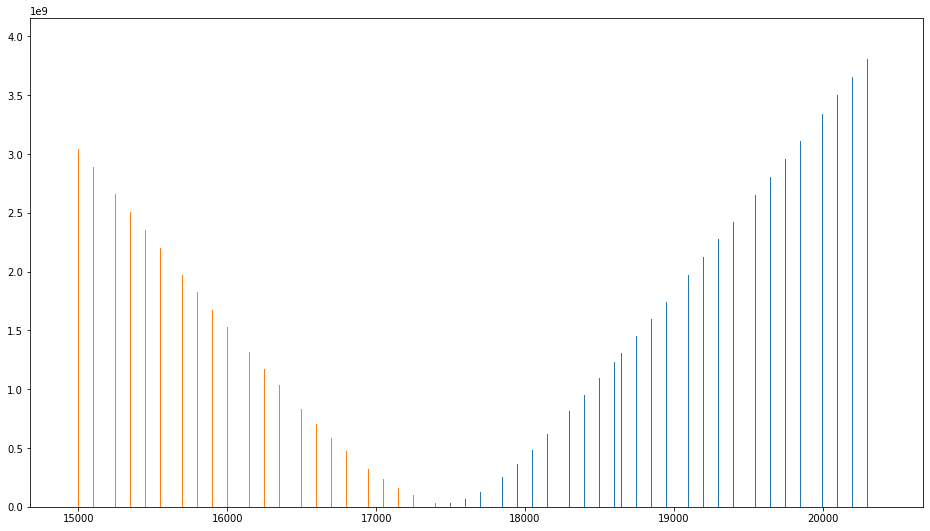

--------------------------
PCR: 1.008827030140142
--------------------------


STRIKE PRICE       17500.0
CALL OI           146307.0
PUT OI            128111.0
CALL PAIN       35938200.0
PUT PAIN        10033500.0
TOTAL PAIN      45971700.0
Name: 51, dtype: float64

In [2]:
file_path = '/content/option-chain-ED-NIFTY-20-Oct-2022.csv'
MAX_PAIN = max_pain(file_path)

In [3]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Bar(
    x=MAX_PAIN['STRIKE PRICE'], y=MAX_PAIN['CALL PAIN'],
    name='CALL PAIN',
    marker_color='lightsalmon'))

fig.add_trace(go.Bar(
    x=MAX_PAIN['STRIKE PRICE'], y=MAX_PAIN['PUT PAIN'],
    name='PUT PAIN',
    marker_color='indianred'))

fig.update_layout(
    autosize=False,
    width=1280,
    height=720,
)

fig.show()

# Test for `call_profit` and `put_profit`

In [4]:
spot_price = 1000 
strike_price = 1000 
premium = 25
spot = np.arange(0.9*spot_price,1.1*spot_price) 

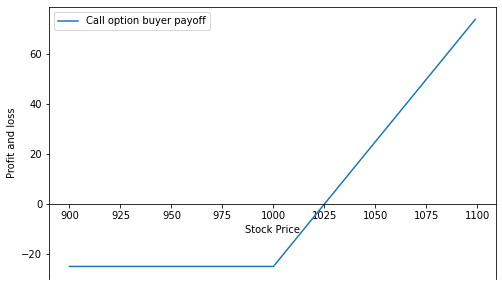

In [5]:
longcall = call_profit(strike_price, spot, premium=premium)
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(spot, longcall,label='Call option buyer payoff')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

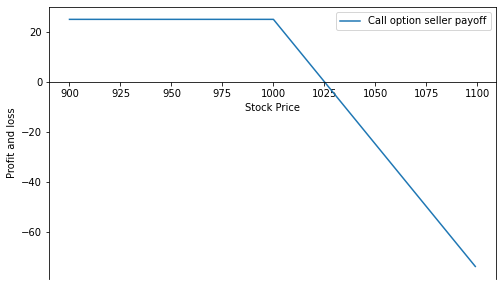

In [6]:
shortcall = call_profit(strike_price, spot, premium=premium, position='short')
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(spot, shortcall,label='Call option seller payoff')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

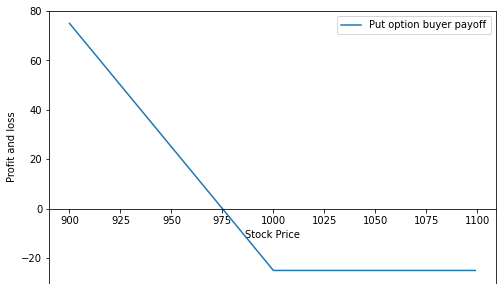

In [7]:
longput = put_profit(strike_price, spot, premium=premium)
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(spot, longput, label='Put option buyer payoff')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

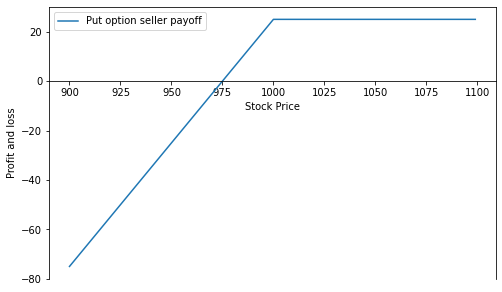

In [8]:
shortput = put_profit(strike_price, spot, premium=premium, position='short')
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(spot, shortput, label='Put option seller payoff')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

# Rough

In [9]:
call_profit(900, 910, 10)

0